# Resources
- https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Python-API.md
    - Fairly sparse documentation, which is why the below notebook is useful
- https://colab.research.google.com/drive/1Qg6E5kmf9n4G8rc5lXHIM_cQzMUFGH-g#forceEdit=true&sandboxMode=true&scrollTo=vdWG6_SqtNtv
    - This is a little outdated, but you can figure out what methods an object `obj` has available via the `dir(obj)` function

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlagents_envs.environment import UnityEnvironment

In [14]:
SEED = 1
env = UnityEnvironment(seed=SEED)

In [15]:
env.reset()

In [16]:
behavior_name = list(env.behavior_specs.keys())[0]
behavior_name

'RollerBall?team=0'

In [17]:
spec = env.behavior_specs[behavior_name]
spec

BehaviorSpec(observation_shapes=[(84, 84, 3), (8,)], action_spec=ActionSpec(continuous_size=2, discrete_branches=()))

In [18]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_shapes))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(shape) == 3 for shape in spec.observation_shapes)
print("Is there a visual observation ?", vis_obs)

Number of observations :  2
Is there a visual observation ? True


In [19]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

Here is the first visual observation


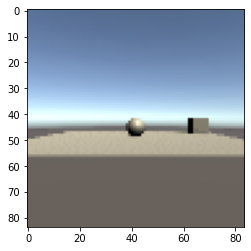

First vector observations :  [3.9974775 0.5       2.1941023 0.        0.5       0.        0.
 0.       ]


In [22]:
for index, shape in enumerate(spec.observation_shapes):
    if len(shape) == 3:
        print("Here is the first visual observation")
        plt.imshow(decision_steps.obs[index][0,:,:,:])
        plt.show()

for index, shape in enumerate(spec.observation_shapes):
    if len(shape) == 1:
        print("First vector observations : ", decision_steps.obs[index][0,:])

In [23]:
dir(spec.action_spec)

['__add__',
 '__annotations__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_field_types',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 '_validate_action',
 'continuous_size',
 'count',
 'create_continuous',
 'create_discrete',
 'discrete_branches',
 'discrete_size',
 'empty_action',
 'index',
 'is_continuous',
 'is_discrete',
 'random_action']

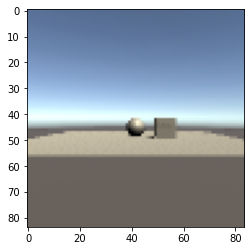

1


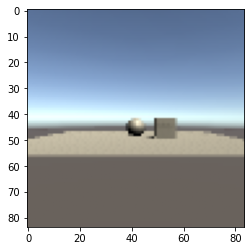

2


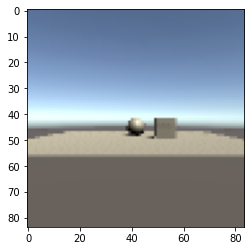

3


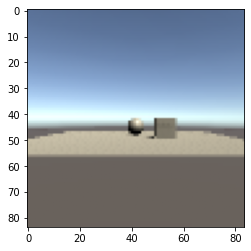

4


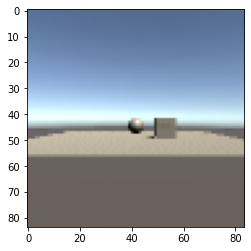

5


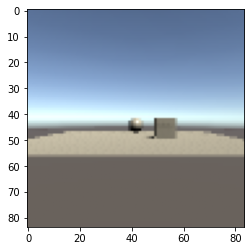

6


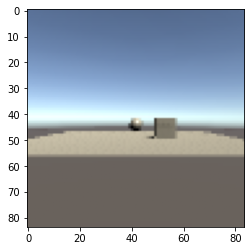

7


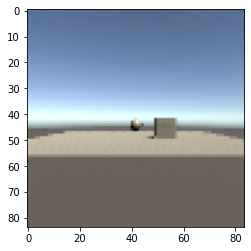

8


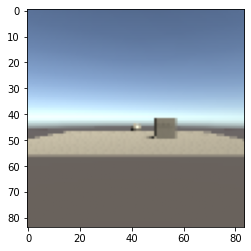

9
Total rewards for episode 0 is 0.0


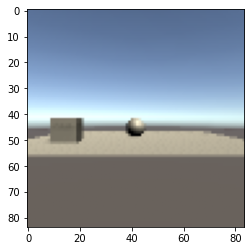

1


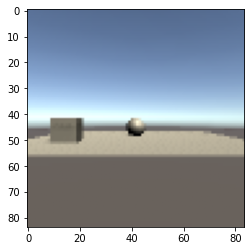

2


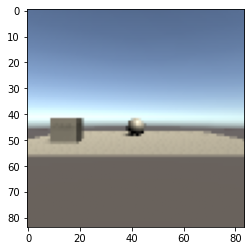

3


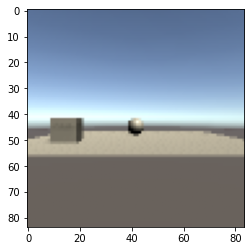

4


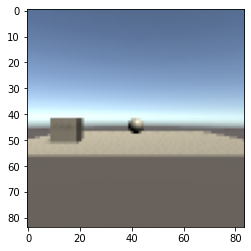

5


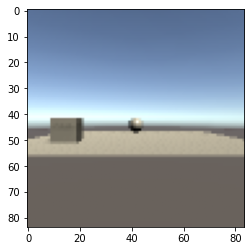

6


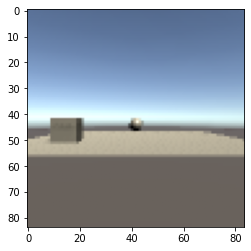

7


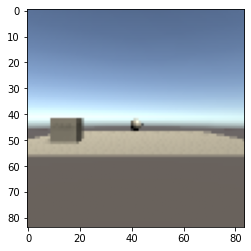

8
Total rewards for episode 1 is 0.0


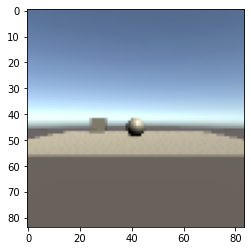

1


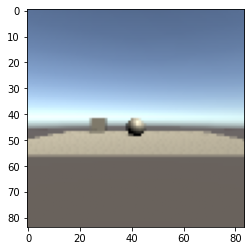

2


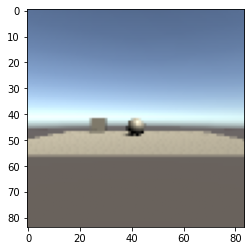

3


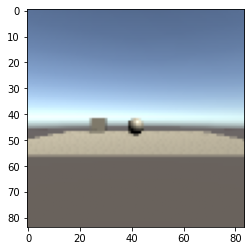

4


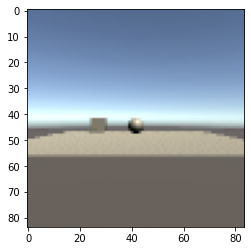

5


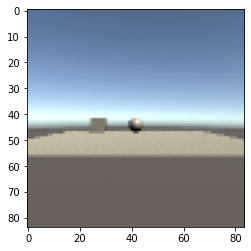

6


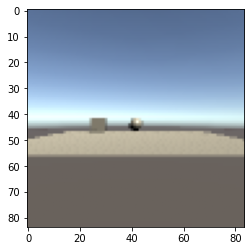

7


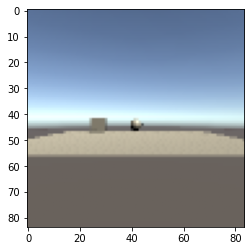

8
Total rewards for episode 2 is 0.0


In [24]:
for episode in range(3):
    env.reset()

    decision_steps, terminal_steps = env.get_steps(behavior_name)
    tracked_agent = -1 # -1 indicates not yet tracking
    done = False # For the tracked_agent
    episode_rewards = 0 # For the tracked_agent
    
    frame = 0
    while not done:
        if tracked_agent == -1 and len(decision_steps) >= 1:
            tracked_agent = decision_steps.agent_id[0]
    
        # Generate an action for all agents
#         action = spec.action_spec.random_action(len(decision_steps))

        action = spec.action_spec.empty_action(1)
        action_array = np.array([[0, 1]])
        action.add_continuous(action_array)
        
        for index, shape in enumerate(spec.observation_shapes):
            if len(shape) == 3:
                plt.imshow(decision_steps.obs[index][0,:,:,:])
                plt.show()

        # Set the actions
        env.set_actions(behavior_name, action)

        # Move the simulation forward
        env.step()

        # Get the new simulation results
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        if tracked_agent in decision_steps: # The agent requested a decision
            episode_rewards += decision_steps[tracked_agent].reward
        if tracked_agent in terminal_steps: # The agent terminated its episode
            episode_rewards += terminal_steps[tracked_agent].reward
            done = True
        
        frame += 1
        
        print(frame)

    print(f"Total rewards for episode {episode} is {episode_rewards}")

In [25]:
env.close()